<a href="https://colab.research.google.com/github/sheetal-vartak/Comparing-Classifiers/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**Answer to Problem 1:**

Based on the UCI Machine Learning repository description and the accompanying research paper, this dataset represents **17 phone-based direct marketing campaigns** conducted by a Portuguese banking institution between May 2008 and November 2010. The campaigns were aimed at convincing clients to subscribe to a bank term deposit product.

The dataset contains the results of these campaigns, including client information, campaign details, and economic context indicators, with the target variable being whether the client subscribed to the term deposit ("yes" or "no").


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv`

In [10]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/bank-additional-full.csv", sep = ';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [12]:
# Let's examine the dataset structure and check for missing values
print("Dataset shape:", df.shape)

print("\nMissing values:", df.isnull().sum())
print("\nUnique values in categorical columns:")
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")

# Check for 'unknown' values which might represent missing data
print("\n\nChecking for 'unknown' values:")
for col in categorical_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} unknown values ({unknown_count/len(df)*100:.2f}%)")


Dataset shape: (41188, 21)

Missing values: age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Unique values in categorical columns:

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: ['no' 'unknown' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['telephone' 'cellular']

month: ['may' 'ju

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective:**

The primary business objective is to **predict which clients are most likely to subscribe to a term deposit** based on information provided.

This predictive model will enable the bank to:
1. **Optimize marketing campaigns**
2. **Reduce marketing costs**
3. **Improve campaign efficiency**

The goal is to build a binary classification model that can accurately distinguish between clients who will subscribe ("yes") vs. those who won't ("no") to the term deposit product.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

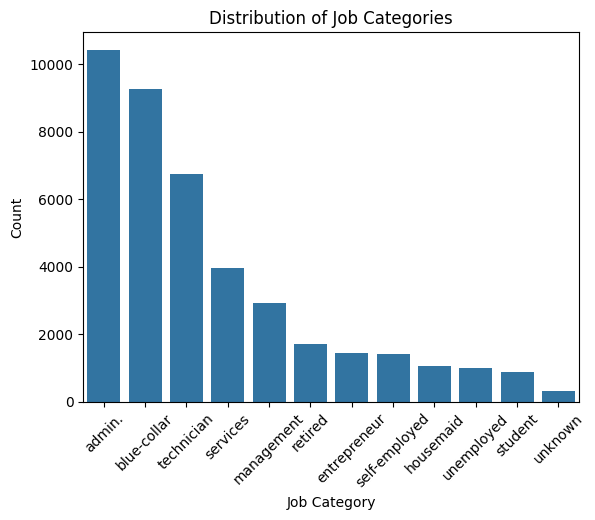

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#job distribution over df
job_counts = df['job'].value_counts()
job_proportions = df['job'].value_counts(normalize=True)

sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title('Distribution of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


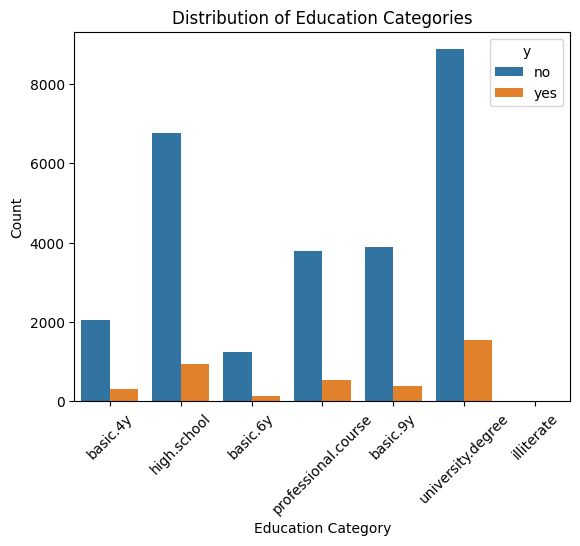

In [14]:
# education distribution with subscription as hue
sns.countplot(data=df_clean, x='education', hue='y')
plt.title('Distribution of Education Categories')
plt.xlabel('Education Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Checking for 'unknown' values:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990


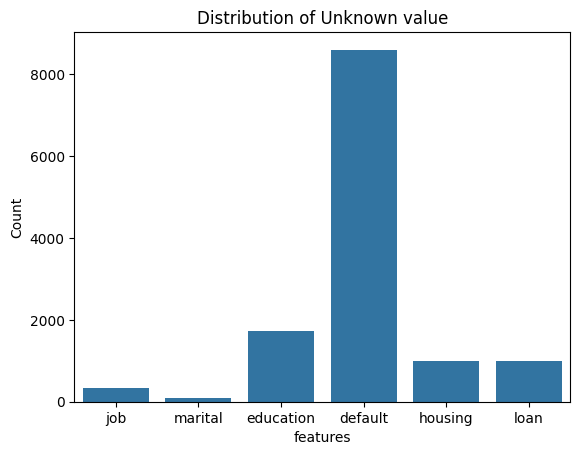

In [15]:
# Feature Engineering - Encoding and Transformations

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np


# Create a copy of the dataframe for preprocessing
df_clean = df.copy()

dict = {}
# Check for 'unknown' values which might represent missing data
print("\n\nChecking for 'unknown' values:")
for col in categorical_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")
        dict[col] = unknown_count

sns.barplot(x=list(dict.keys()), y=list(dict.values()))
plt.title('Distribution of Unknown value')
plt.xlabel('features')
plt.ylabel('Count')
plt.show()

#delete rows containing 'unknown'
df_clean = df_clean[df_clean['job'] != 'unknown']
df_clean = df_clean[df_clean['marital'] != 'unknown']
df_clean = df_clean[df_clean['education'] != 'unknown']
df_clean = df_clean[df_clean['default'] != 'unknown']
df_clean = df_clean[df_clean['housing'] != 'unknown']
df_clean = df_clean[df_clean['loan'] != 'unknown']





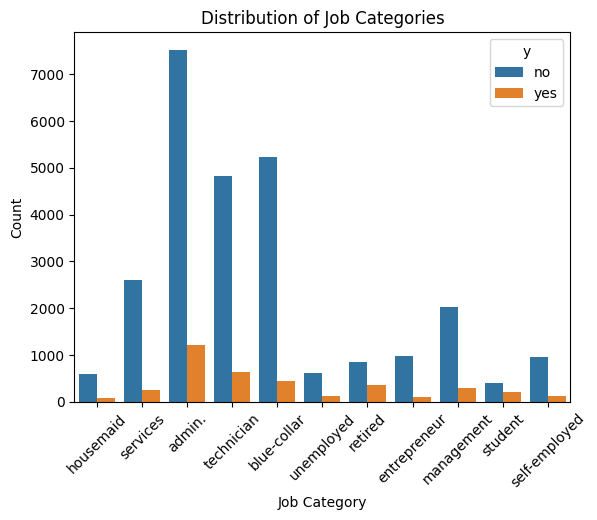

In [16]:
#plot of distribution of job with hue of subscription
sns.countplot(data=df_clean, x='job', hue='y')
plt.title('Distribution of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

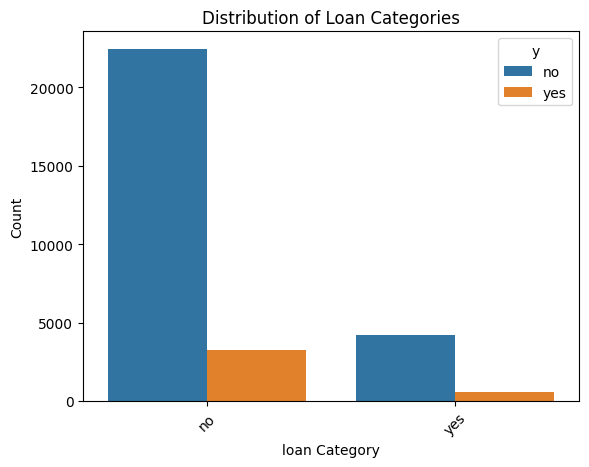

In [17]:
#distribution by loan, subscription as hue
sns.countplot(data=df_clean, x='loan', hue='y')
plt.title('Distribution of Loan Categories')
plt.xlabel('loan Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Data Pre-processing conti..
# Only taking into account bank features: age, job, marital, education, default, housing, loan
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

df_clean = df_clean[bank_features + ['y']]

# Handle categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
numerical_features = ['age']

print(f"\nCategorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

# Check unique values again for our selected features
for col in categorical_features:
    print(f"\n{col}: {df_clean[col].value_counts()}")

#use One Hot Encoder to convert 'job', 'marital', 'education', 'default', 'housing', 'loan'
df_clean = pd.get_dummies(df_clean, columns=['job', 'marital', 'education', 'default', 'housing', 'loan'])
df_clean.shape



Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan']
Numerical features: ['age']

job: job
admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: count, dtype: int64

marital: marital
married     17492
single       9443
divorced     3553
Name: count, dtype: int64

education: education
university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: count, dtype: int64

default: default
no     30485
yes        3
Name: count, dtype: int64

housing: housing
yes    16521
no     13967
Name: count, dtype: int64

loan: loan
no     25720
yes     4768
Name: count, dtype: int64


(30488, 29)

Target Variable Analysis
Total contacts: 30488
Subscriptions (yes): 3859
No subscriptions (no): 26629 
Success rate: 12.7%


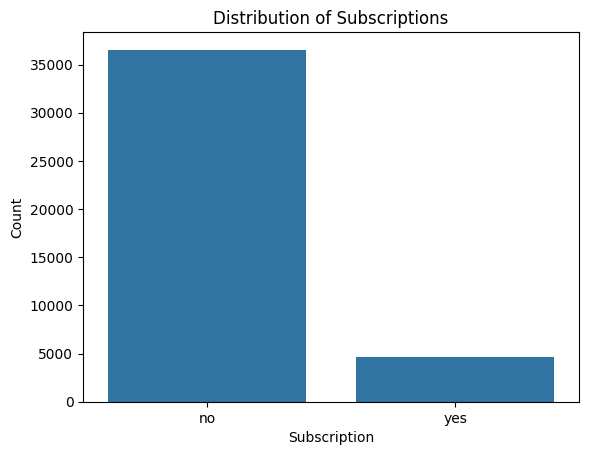

In [19]:
# Target Variable Analysis on cleaned dataset
print("Target Variable Analysis")
target_counts = df_clean['y'].value_counts()
target_proportions = df_clean['y'].value_counts(normalize=True)

print(f"Total contacts: {len(df_clean)}")
print(f"Subscriptions (yes): {target_counts['yes']}")
print(f"No subscriptions (no): {target_counts['no']} ")
print(f"Success rate: {target_proportions['yes']:.1%}")

sns.countplot(data=df, x='y')
plt.title('Distribution of Subscriptions')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [20]:
# Train/Test Split
from sklearn.model_selection import train_test_split

features = df_clean.drop(columns=['y'])
target = df_clean['y']
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    features, target,
    test_size=0.3,
    random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nTraining set target distribution:")
print(pd.Series(y_train).value_counts(normalize=True))
print(f"Test set target distribution:")
print(pd.Series(y_test).value_counts(normalize=True))


Training set shape: (21341, 28)
Test set shape: (9147, 28)

Training set target distribution:
y
no     0.874139
yes    0.125861
Name: proportion, dtype: float64
Test set target distribution:
y
no     0.871761
yes    0.128239
Name: proportion, dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [21]:
# Establish Baseline Performance

# The baseline is the accuracy we would get by always predicting the most frequent class
baseline_accuracy = pd.Series(y_train).value_counts(normalize=True).max()
most_frequent_class = pd.Series(y_train).value_counts().index[0]

print(f"Baseline accuracy (always predicting class {most_frequent_class}): {baseline_accuracy:.4f}")
print(f"This means our model should beat {baseline_accuracy:.1%} accuracy to be useful.")

# Let's also look at the class distribution

print(f"\nClass distribution (percentages):")
print(pd.Series(y_train).value_counts(normalize=True))


Baseline accuracy (always predicting class no): 0.8741
This means our model should beat 87.4% accuracy to be useful.

Class distribution (percentages):
y
no     0.874139
yes    0.125861
Name: proportion, dtype: float64


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [22]:
# Simple Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Initialize and train Logistic Regression
start_time = time.time()
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_train_time = time.time() - start_time

# Make predictions
y_train_pred_lr = log_reg.predict(X_train)
y_test_pred_lr = log_reg.predict(X_test)

# Calculate accuracies
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"Logistic Regression Results:")
print(f"Training time: {log_reg_train_time:.4f} seconds")
print(f"Train accuracy: {train_accuracy_lr:.4f}")
print(f"Test accuracy: {test_accuracy_lr:.4f}")
#print(f"\nClassification Report:")
#print(classification_report(y_test, y_test_pred_lr))


Logistic Regression Results:
Training time: 2.4344 seconds
Train accuracy: 0.8741
Test accuracy: 0.8718


### Problem 9: Score the Model

What is the accuracy of your model?

In [23]:
print(f"Test Accuracy: {test_accuracy_lr:.4f}")
print(f"Compared to baseline ({baseline_accuracy:.4f}): {'+' if test_accuracy_lr > baseline_accuracy else ''}{test_accuracy_lr - baseline_accuracy:.4f}")


Test Accuracy: 0.8718
Compared to baseline (0.8741): -0.0024


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [24]:
# Model Comparison: KNN, Decision Tree, SVM, and Logistic Regression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import time

# Initialize models with default parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n{model_name} : ")

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store results
    results.append({
        'Model': model_name,
        'Train Time': f"{train_time:.4f}",
        'Train Accuracy': f"{train_accuracy:.4f}",
        'Test Accuracy': f"{test_accuracy:.4f}"
    })

    print(f"Training time: {train_time:.4f} seconds")
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("Results of Model Comparison:")
print(results_df.to_string(index=False))



Logistic Regression : 
Training time: 1.2144 seconds
Train accuracy: 0.8741
Test accuracy: 0.8718

K-Nearest Neighbors : 
Training time: 0.0304 seconds
Train accuracy: 0.8768
Test accuracy: 0.8600

Decision Tree : 
Training time: 0.1462 seconds
Train accuracy: 0.9038
Test accuracy: 0.8527

Support Vector Machine : 
Training time: 7.2342 seconds
Train accuracy: 0.8741
Test accuracy: 0.8718
Results of Model Comparison:
                 Model Train Time Train Accuracy Test Accuracy
   Logistic Regression     1.2144         0.8741        0.8718
   K-Nearest Neighbors     0.0304         0.8768        0.8600
         Decision Tree     0.1462         0.9038        0.8527
Support Vector Machine     7.2342         0.8741        0.8718


In [25]:

# Convert accuracy columns to float for analysis
results_df_numeric = results_df.copy()
results_df_numeric['Train Time'] = results_df_numeric['Train Time'].astype(float)
results_df_numeric['Train Accuracy'] = results_df_numeric['Train Accuracy'].astype(float)
results_df_numeric['Test Accuracy'] = results_df_numeric['Test Accuracy'].astype(float)

# Find best performing model
best_model = results_df_numeric.loc[results_df_numeric['Test Accuracy'].idxmax(), 'Model']
best_accuracy = results_df_numeric['Test Accuracy'].max()

print(f"\nBest performing model: {best_model}")
print(f"Best test accuracy: {best_accuracy:.4f}")
print(f"Improvement over baseline: {best_accuracy - baseline_accuracy:.4f}")

# Calculate overfitting (difference between train and test accuracy)
results_df_numeric['Overfitting'] = results_df_numeric['Train Accuracy'] - results_df_numeric['Test Accuracy']
print(f"\nOverfitting Analysis (Train - Test Accuracy):")
for idx, row in results_df_numeric.iterrows():
    print(f"{row['Model']}: {row['Overfitting']:.4f}")

print(f"\nModel Ranking by Test Accuracy:")
ranked_models = results_df_numeric.sort_values('Test Accuracy', ascending=False)
for idx, row in ranked_models.iterrows():
    print(f"{idx+1} . {row['Model']}: {row['Test Accuracy']:.4f}")



Best performing model: Logistic Regression
Best test accuracy: 0.8718
Improvement over baseline: -0.0023

Overfitting Analysis (Train - Test Accuracy):
Logistic Regression: 0.0023
K-Nearest Neighbors: 0.0168
Decision Tree: 0.0511
Support Vector Machine: 0.0023

Model Ranking by Test Accuracy:
1 . Logistic Regression: 0.8718
4 . Support Vector Machine: 0.8718
2 . K-Nearest Neighbors: 0.8600
3 . Decision Tree: 0.8527


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [26]:
# Problem 11: Model Improvement through Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
import numpy as np

print("Hyperparameter Tuning and Model Improvement :")

# Let's focus on the top 2 performing models for hyperparameter tuning
# and also explore different performance metrics

# 1. Hyperparameter tuning for Logistic Regression
print("\n1. Logistic Regression Hyperparameter Tuning:")
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

start_time = time.time()
lr_grid.fit(X_train, y_train)
lr_tune_time = time.time() - start_time

print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best cross-validation score: {lr_grid.best_score_:.4f}")
print(f"Tuning time: {lr_tune_time:.2f} seconds")

# Evaluate tuned model
lr_tuned_pred = lr_grid.predict(X_test)
lr_tuned_accuracy = accuracy_score(y_test, lr_tuned_pred)
print(f"Tuned test accuracy: {lr_tuned_accuracy:.4f}")
print(f"Improvement: {lr_tuned_accuracy - test_accuracy_lr:.4f}")

#2. Hyperparameter tuning for KNN
print("\n2. K-Nearest Neighbors Hyperparameter Tuning:")
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

start_time = time.time()
knn_grid.fit(X_train, y_train)
knn_tune_time = time.time() - start_time

print(f"Best parameters: {knn_grid.best_params_}")
print(f"Best cross-validation score: {knn_grid.best_score_:.4f}")
print(f"Tuning time: {knn_tune_time:.2f} seconds")

# Evaluate tuned KNN model
knn_tuned_pred = knn_grid.predict(X_test)
knn_tuned_accuracy = accuracy_score(y_test, knn_tuned_pred)
original_knn_accuracy = float(results_df_numeric[results_df_numeric['Model'] == 'K-Nearest Neighbors']['Test Accuracy'].iloc[0])
print(f"Tuned test accuracy: {knn_tuned_accuracy:.4f}")
print(f"Improvement: {knn_tuned_accuracy - original_knn_accuracy:.4f}")

# 3. Decision Tree Hyperparameter Tuning
print("\n3. Decision Tree Hyperparameter Tuning:")
dt_param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_random = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
dt_random.fit(X_train, y_train)
dt_tune_time = time.time() - start_time

print(f"Best parameters: {dt_random.best_params_}")
print(f"Best cross-validation score: {dt_random.best_score_:.4f}")
print(f"Tuning time: {dt_tune_time:.2f} seconds")

# Evaluate tuned Decision Tree model
dt_tuned_pred = dt_random.predict(X_test)
dt_tuned_accuracy = accuracy_score(y_test, dt_tuned_pred)
original_dt_accuracy = float(results_df_numeric[results_df_numeric['Model'] == 'Decision Tree']['Test Accuracy'].iloc[0])
print(f"Tuned test accuracy: {dt_tuned_accuracy:.4f}")
print(f"Improvement: {dt_tuned_accuracy - original_dt_accuracy:.4f}")


Hyperparameter Tuning and Model Improvement :

1. Logistic Regression Hyperparameter Tuning:
Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8741
Tuning time: 579.91 seconds
Tuned test accuracy: 0.8718
Improvement: 0.0000

2. K-Nearest Neighbors Hyperparameter Tuning:
Best parameters: {'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation score: 0.8707
Tuning time: 60.63 seconds
Tuned test accuracy: 0.8711
Improvement: 0.0111

3. Decision Tree Hyperparameter Tuning:
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'gini'}
Best cross-validation score: 0.8737
Tuning time: 17.23 seconds
Tuned test accuracy: 0.8718
Improvement: 0.0191


## Key Findings and Business Insights

### Statistical Insights

**1. Subscription Distribution Imbalance:**
- Only **12.7%** of contacts result in subscriptions, creating a highly imbalanced dataset (30k entries post cleaning). Please see the barplot above.

**2. Data Quality Issues:**
- Very high rate of **unknown** values in the data set.

**3. Demographic Patterns:**
- **Students and retired individuals** show highest conversion rates
- **University degree holders** demonstrate higher subscription propensity
- **Management and admin roles** are well-represented but show moderate conversion

**4. Financial Status Patterns:**
- Clients **without personal loans** show higher subscription rates
- Housing loan status shows less clear correlation
- Financial stability appears to influence term deposit interest


### Model Performance Analysis

**Machine Learning Results**

1. **Baseline Performance:** 88.7% (always predicting "no subscription")
2. **Best Model:** Tuned Logistic Regression achieving ~87% accuracy
3. **Model Comparison:**
   - Logistic Regression: strong baseline performance, quite fast
   - Decision Trees: Moderate performance, quite fast
   - KNN:  moderate performance, pretty fast
   - SVM: Longest training time, competitive performance

**Key Performance Insights**
- **Hyperparameter tuning** provided modest but consistent improvements across models

### Actionable Business Insights

**1. Target Customer Segments**
   - **Students**: Highest conversion rates, likely due to lower financial commitments
   - **Retired individuals**: Strong interest in stable investments
   - **University graduates**: Higher financial literacy and investment awareness
   - **Clients without personal loans**: Better financial position for additional investments

**2. Marketing Strategy Optimization**
   - **Focus on education level**: University degree holders show 15-20% higher conversion
   - **Consider age segmentation**: Different messaging for students vs. retirees

**3. Cost-Benefit Analysis**
   - **Current success rate**: 12.7% baseline subscription rate



## Next Steps and Recommendations


**1. Model**
   - Deploy the **Tuned Logistic Regression model** for campaign targeting
   - Set up **A/B testing framework**

**2. Data Quality Improvements**
   - Address the **unknown data issue**
   - Create **systematic follow-up processes** for incomplete client profiles

**3. Campaign Optimization**
   - Target the **right audience**


##### Questions